# Recongizing Traffic Signs usign CNN

## Installing kaggle CLI 
- To download data into our google drive

In [1]:
!pip install kaggle

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 58 kB 881 kB/s eta 0:00:011
     |████████████████████████████████| 78 kB 769 kB/s  eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=736b50f834c539b496449de16f7c69396d57d445937b7bd9f8007ecc56bce307
  Stored in directory: /home/smit/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Smit/kaggle"

Going to Kaggle folder to download data

In [3]:
%cd /content/drive/MyDrive/Smit/kaggle

[Errno 2] No such file or directory: '/content/drive/MyDrive/Smit/kaggle'
/home/smit/Smit/Projects/012_Traffic_Signal_Classifier_Mini_Project


So let's download data with kaggle command

In [4]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Traceback (most recent call last):
  File "/home/smit/.local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/home/smit/.local/lib/python3.8/site-packages/kaggle/__init__.py", line 19, in <module>
    from kaggle.api.kaggle_api_extended import KaggleApi
  File "/home/smit/.local/lib/python3.8/site-packages/kaggle/api/__init__.py", line 22, in <module>
    from kaggle.api.kaggle_api_extended import KaggleApi
  File "/home/smit/.local/lib/python3.8/site-packages/kaggle/api/kaggle_api_extended.py", line 84, in <module>
    class KaggleApi(KaggleApi):
  File "/home/smit/.local/lib/python3.8/site-packages/kaggle/api/kaggle_api_extended.py", line 102, in KaggleApi
    os.makedirs(config_dir)
  File "/usr/lib/python3.8/os.py", line 213, in makedirs
    makedirs(head, exist_ok=exist_ok)
  File "/usr/lib/python3.8/os.py", line 213, in makedirs
    makedirs(head, exist_ok=exist_ok)
  File "/usr/lib/python3.8/os.py", line 213, in makedirs
    makedirs(head, exist_ok=exist

Unzipping data 

In [5]:
!unzip \*.zip  && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [6]:
!pwd

/home/smit/Smit/Projects/012_Traffic_Signal_Classifier_Mini_Project


## Installing tensorflow-gpu 
- for better effeciency and faster training

In [7]:
!pip install tensorflow-gpu

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 454.4 MB 24 bytes/s a 0:00:01    |██████▌                         | 92.5 MB 3.5 MB/s eta 0:01:44MB 430 kB/s eta 0:05:10
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     |████████████████████████████████| 1.2 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 47 kB/s  eta 0:00:01
     |████████████████████████████████| 462 kB 5.5 MB/s eta 0:00:01
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
     |████████████████████████████████| 4.4 MB 49 kB/s 

Let's check which GPU is allocated to us.

In [8]:
!nvidia-smi

Wed May 26 16:46:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.73.01    Driver Version: 460.80       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce MX150       Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8    N/A /  N/A |      2MiB /  4042MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## About Dataset and its structure

- I took this dataset from kaggle but this dataset official name is GTSRB - German Traffic Sign Recognition Benchmark, which had been rolled out by Germany.
- This Dataset contains 43 types of traffic signs.
- Structure of data folder


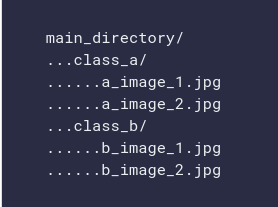

In [9]:
# Dictionary to map classes.
classes = { 
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)', 
    2:'Speed limit (50km/h)', 
    3:'Speed limit (60km/h)', 
    4:'Speed limit (70km/h)', 
    5:'Speed limit (80km/h)', 
    6:'End of speed limit (80km/h)', 
    7:'Speed limit (100km/h)', 
    8:'Speed limit (120km/h)', 
    9:'No passing', 
    10:'No passing veh over 3.5 tons', 
    11:'Right-of-way at intersection', 
    12:'Priority road', 
    13:'Yield', 
    14:'Stop', 
    15:'No vehicles', 
    16:'Veh > 3.5 tons prohibited', 
    17:'No entry', 
    18:'General caution', 
    19:'Dangerous curve left', 
    20:'Dangerous curve right', 
    21:'Double curve', 
    22:'Bumpy road', 
    23:'Slippery road', 
    24:'Road narrows on the right', 
    25:'Road work', 
    26:'Traffic signals', 
    27:'Pedestrians', 
    28:'Children crossing', 
    29:'Bicycles crossing', 
    30:'Beware of ice/snow',
    31:'Wild animals crossing', 
    32:'End speed + passing limits', 
    33:'Turn right ahead', 
    34:'Turn left ahead', 
    35:'Ahead only', 
    36:'Go straight or right', 
    37:'Go straight or left', 
    38:'Keep right', 
    39:'Keep left', 
    40:'Roundabout mandatory', 
    41:'End of no passing', 
    42:'End no passing veh > 3.5 tons'
          }

## 1. Importing the necessary libraries

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import os
import warnings
import shutil

warnings.filterwarnings("ignore")

- Initializing some useful variables and paths

In [11]:
# input_path = "/content/drive/MyDrive/Smit/kaggle"
# train_path = "/content/drive/MyDrive/Smit/kaggle/Train"
# test_path = "/content/drive/MyDrive/Smit/kaggle/Test"
input_path = "./data/archive/"
train_path = "./data/archive/Train"
test_path = "./data/archive/Test"

# new_test_path = "/content/drive/MyDrive/Smit/kaggle/New_Test"

image_data = []
image_labels = []

# Number of total classes
total_classes = 43

# Batch size
batch_size = 32

# Dimensions of our images
height = 32
width = 32
channels = 3

## Making Test Folder like Train for our convenience ( Optional )
- Avoid this step for time's sake

In [12]:
df = pd.read_csv(input_path + "/Test.csv")
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [13]:
# labels = df['ClassId'].values
# img = df['Path'].values
# print(len(labels), img)
# if os.path.exists(new_test_path) is False:
#   os.mkdir(new_test_path)
# for i in range(len(labels)):
#   if os.path.exists(new_test_path + "/" + str(labels[i])) is False:
#     os.mkdir(new_test_path + "/" + str(labels[i]))
#   src_path = input_path + "/" + img[i]
#   des_path = new_test_path + "/" + str(labels[i]) + "/" + img[i].split("/")[1]
#   try:
#     shutil.copy(src_path, des_path)
#     print("Success")
#   except:
#     print(f"Can't Copy from {src_path} to {des_path}")

## Image preprocessing and loading

### Spliting into training and validation sets

In [14]:
# train_data_gen = tf.keras.preprocessing.image_dataset_from_directory(
#     train_path,
#     validation_split = 0.2,
#     subset = "training",
#     seed = 123,
#     image_size = (height, width),
#     batch_size = batch_size
# )
# val_data_gen = tf.keras.preprocessing.image_dataset_from_directory(
#     train_path,
#     validation_split = 0.2,
#     subset = "validation",
#     seed = 123,
#     image_size = (height, width),
#     batch_size = batch_size
# )

### Another method of doing it.

In [15]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                          validation_split = 0.2)

In [16]:
train_datagen = datagen.flow_from_directory(train_path,
                                            target_size = (32, 32),
                                            batch_size = batch_size,
                                            subset = "training",
                                            class_mode='categorical',
                                           shuffle = True)

Found 31368 images belonging to 43 classes.


In [17]:
val_datagen = datagen.flow_from_directory(train_path,
                                            target_size = (32, 32),
                                            batch_size = batch_size,
                                            subset = "validation",
                                            class_mode='categorical',
                                           shuffle = True)

Found 7841 images belonging to 43 classes.


## Creating model architecture 

In [18]:
def my_model():
    input_ = tf.keras.layers.Input((height, width, channels))
    net = tf.keras.layers.Conv2D(filters=18, kernel_size=(5,5), strides=1, activation="relu")(input_)
    net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(net)
    net = tf.keras.layers.Dropout(0.2)(net)
    
    net = tf.keras.layers.Conv2D(filters=36, kernel_size=(5,5), strides=1, activation="relu",
                                 kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.01))(net)
    net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(net)
    
    net = tf.keras.layers.Conv2D(filters=36, kernel_size=(5,5), activation="relu")(net)
    net = tf.keras.layers.MaxPooling2D(pool_size=(1, 1))(net)
    net = tf.keras.layers.Dropout(0.2)(net)
    
    net = tf.keras.layers.Flatten()(net)
    net = tf.keras.layers.Dense(72, activation= 'relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.01))(net)
    out = tf.keras.layers.Dense(total_classes, activation='softmax')(net)
    
    model = tf.keras.Model(inputs=[input_], outputs=[out])

    model.compile(loss=tf.keras.losses.categorical_crossentropy, 
                  optimizer=tf.keras.optimizers.Adam(lr=0.009), 
                  metrics=['accuracy'])
    model.summary()
    tf.keras.utils.plot_model(model, to_file='./model.png', show_shapes=True)
    return model

In [19]:
model = my_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 18)        1368      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 18)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 18)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 36)        16236     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 36)          32436 

### Defining Callbacks

In [20]:
# Define a Callback class that stops training once accuracy reaches certain limit
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.95):
          print("\nReached 95% accuracy so cancelling training!")
          self.model.stop_training = True
        
reduceLROnPlat = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.95,
        patience=2,
        verbose=1,
        mode='min',
        min_delta=0.0001,
        cooldown=2,
        min_lr=1e-5
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "./model_best.h5", monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='auto', save_freq='epoch'
)

my_callback = myCallback()

In [21]:
history = model.fit_generator(train_datagen,
                               epochs = 20,
                               verbose = 1,
                               validation_data = val_datagen)

Epoch 1/20
981/981 [==============================] - 359s 364ms/step - loss: 2.2765 - accuracy: 0.3443 - val_loss: 1.7878 - val_accuracy: 0.4904
Epoch 2/20
981/981 [==============================] - 35s 36ms/step - loss: 1.7563 - accuracy: 0.4862 - val_loss: 1.5545 - val_accuracy: 0.5633
Epoch 3/20
981/981 [==============================] - 22s 23ms/step - loss: 1.6437 - accuracy: 0.5300 - val_loss: 1.4504 - val_accuracy: 0.5633
Epoch 4/20
981/981 [==============================] - 27s 27ms/step - loss: 1.5082 - accuracy: 0.5648 - val_loss: 1.2563 - val_accuracy: 0.6636
Epoch 5/20
981/981 [==============================] - 27s 27ms/step - loss: 1.4677 - accuracy: 0.5845 - val_loss: 1.2614 - val_accuracy: 0.6809
Epoch 6/20
981/981 [==============================] - 28s 28ms/step - loss: 1.4249 - accuracy: 0.6016 - val_loss: 1.3530 - val_accuracy: 0.6184
Epoch 7/20
981/981 [==============================] - 28s 28ms/step - loss: 1.3878 - accuracy: 0.6105 - val_loss: 1.2276 - val_accurac

In [22]:
df = pd.read_csv("./data/archive/Test.csv")
df.head()


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [23]:
from sklearn.metrics import accuracy_score

In [24]:
labels = df['ClassId'].values
path = df['Path'].values
final_res = []
count = 0
correct = 0
for img in input_path + path:
    if count == 500:
        break
    img1 = tf.keras.preprocessing.image.load_img(img, target_size=(32, 32))
    test_img = tf.keras.preprocessing.image.img_to_array(img1, data_format="channels_last")/255
    test_img = np.expand_dims(test_img, axis=0)
    scores = model.predict(test_img)
    preds = np.argmax(scores, axis = 1)
    final_res.append(preds)
    if preds == labels[count]:
        correct += 1
        print(correct)
    count += 1

print(accuracy_score(labels[:500], final_res, normalize = True))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
0.046


In [25]:
img = "./data/archive/test/00497.png"
def get_output(img):
    img1 = tf.keras.preprocessing.image.load_img(img, target_size=(32, 32), interpolation='nearest')
    test_img = tf.keras.preprocessing.image.img_to_array(img1, data_format="channels_last")/255
    test_img = np.expand_dims(test_img, axis=0)
    scores = model.predict(test_img)
    prob = np.max(scores, axis = 1)
    preds = np.argmax(scores, axis = 1)
    print(f"{prob[0] * 100}% probability of {classes[preds[0]]}")
get_output(img)

51.112669706344604% probability of End no passing veh > 3.5 tons
